<a href="https://colab.research.google.com/github/matthewshawnkehoe/Thinkful/blob/main/births_and_smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Does smoking cause low birth weight?

We are working for a clinic for healthy mothers and have been tasked to see if smoking causes low birth weight. Our analysis will benefit current and future mothers, physicians, and healthcare organizations. We would also like to identify other factors which cause low birth weight.

![](https://www.verywellfamily.com/thmb/xVJtWvUQ4OG6Zo688kUEUc-chto=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/baby-birth-weight-statistics-9b84ab741b2e4eefbdc4f399037558f9.jpg)

Image Source: [Physical Growth in Newborns](https://www.uofmhealth.org/health-library/te6295)

## Table of Contents
---
- [Birth Weight Analysis: Summary](#Birth-Weight-Analysis:-Summary)
- [Import Libraries and Configure Notebook Environment](#Import-Libraries-and-Configure-Notebook-Environment)
- [Understanding the Data](#Understanding-the-Data)
- [Hypothesis](#Hypothesis)
- [Test Statistic](#Test-Statistic)
- [Further Analysis through Additional Variables](#Further-Analysis-through-Additional-Variables)
- [Conclusions](#Conclusions)

## Birth Weight Analysis: Summary

We set out to identify if **smoking** causes **low birth weight**.

There is a wide range of **negative health outcomes** associated with **low birth weight**. For example, it is closely associated with **fetal** and **neonatal mortality** and **morbidity**, **inhibited growth** and **cognitive development** as well as **noncommunicable diseases** in adulthood. Infants with low birth weight are about **20 times more likely to die** than those with a higher birth weight. The clinic hopes to inform prospective mothers about information which could help mothers have children with healthy birth weights.

Our analysis shows that **smoking** is related to **low birth weight**. We found that at a 95% confidence interval, the difference in birth weight between **smokers** and **non-smokers** is between **7.16** and **11.37 ounces.** Further analysis shows that the **total number of gestation days** also **influences birth weight** and, at the 95% confidence interval, the **difference** in **birth weight** between **low and high gestation days** is between **11.62** and 15.57 ounces.


## Import Libraries and Configure Notebook Environment

In [17]:
# Load libraries and configure environment
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
plt.style.use('fivethirtyeight')

## Understanding the Data

To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is the [Berkeley Stats Lab](https://www.stat.berkeley.edu/~statlabs/labs.html) birth weight data. The survey data is publicly available in [this GitHub repository](https://github.com/data-8/textbook). Below, we'll do a quick exploration of the `baby.csv` file stored in the `assets/data` folder of the repository just mentioned. We'll read in the file using the direct link [here](https://github.com/data-8/textbook/tree/main/assets/data/baby.csv).

A quick search shows that the dataset contains 1,174 observations and 6 variables. More specifically, the variables are

* `birth weight`: the baby's birth weight in ounces
* `gestational days`: the number of gestational days
* `maternal age`: the mother's age in years
* `maternal height`: the mother's height in inches
* `maternal pregnancy weight`: the mother's pregnancy weight in pounds
* `maternal smoker`: whether or not the mother smoked during pregnancy

We will now explore the data.

In [2]:
# This doesn't work so I directly put the file it Google Colab
# births = pd.read_csv("https://github.com/data-8/textbook/tree/main/assets/data/baby.csv")
births = pd.read_csv("baby.csv")

# Convert column headers to lower case for ease of coding
births.columns = births.columns.str.lower()

# Inspect data
print(births.shape)

births.info()
births.head()

(1174, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   birth weight               1174 non-null   int64
 1   gestational days           1174 non-null   int64
 2   maternal age               1174 non-null   int64
 3   maternal height            1174 non-null   int64
 4   maternal pregnancy weight  1174 non-null   int64
 5   maternal smoker            1174 non-null   bool 
dtypes: bool(1), int64(5)
memory usage: 47.1 KB


,birth weight,gestational days,maternal age,maternal height,maternal pregnancy weight,maternal smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


We see that we have five numerical fields and a boolean representing categorical data for smoking. None of the fields have nulls, so we won't need to perform any data cleaning.

To prepare our data for future analysis, we will break up our dataset into smokers and nonsmokers.

In [3]:
smoker_yes = births[births['maternal smoker'] == True]
smoker_no = births[births['maternal smoker'] == False]

In [4]:
# Count number of smokers and non-smokers
print(births['maternal smoker'].groupby(births['maternal smoker']).agg(['count']))

                 count
maternal smoker       
False              715
True               459


We see that there are 459 smokers and 715 nonsmokers among the 1174 women sampled. Let's create a histogram comparing the birth weight of smokers and non-smokers to see if our data is normally distributed.

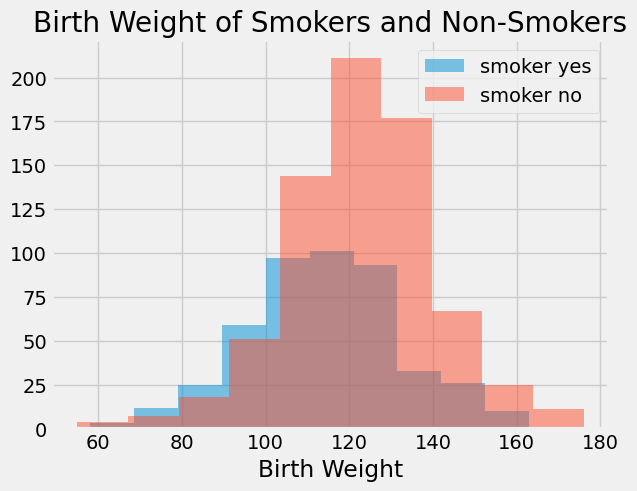

In [29]:
plt.hist(smoker_yes['birth weight'], alpha = .5, label = "smoker yes")
plt.hist(smoker_no['birth weight'], alpha = .5, label = "smoker no")
plt.legend(loc="upper right")
plt.xlabel('Birth Weight')
plt.title("Birth Weight of Smokers and Non-Smokers")
plt.show()

We will also use the `describe` method from the `stats` package to verify that our data is normally distributed.

In [45]:
print(stats.describe(smoker_yes['birth weight']))
print(stats.describe(smoker_no['birth weight']))

DescribeResult(nobs=459, minmax=(58, 163), mean=113.81917211328977, variance=334.7074045532817, skewness=-0.02118644337959522, kurtosis=-0.05246237500936468)
DescribeResult(nobs=715, minmax=(55, 176), mean=123.08531468531469, variance=303.58514818514817, skewness=-0.16278727504369808, kurtosis=1.0168432036227957)


Our histogram and statistics show that our data is normally distributed.

## Hypothesis

We will now formulate our **null (H₀)** and **alternative (Hₐ)** hypothesis in the context of seeing if smoking impacts birth weight.

**H₀:** In the population, the birth weight distribution is the same whether the mother smokes or not. Smoking does not impact birth weight.

**Hₐ:**  In the population, smokers' babies have a lower birth weight on average than those of non-smokers.

## Test Statistic
As our data is normally distributed, we will use the the t-test for independent samples.

In [7]:
# Conduct the t-test
stats.ttest_ind(smoker_yes['birth weight'], smoker_no['birth weight'])

TtestResult(statistic=-8.718755502379533, pvalue=9.461067881089321e-18, df=1172.0)

Based on a p-value of `9.46e-18`, we can reject the null hypothesis that smoking does not impact birth weight. We will also look at the 95% confidence interval.

In [11]:
# Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [49]:
print(get_95_ci(smoker_yes['birth weight'], smoker_no['birth weight']))

The difference in means at the 95% confidence interval (two-tail) is between 7.160802712877646 and 11.37148243117219.


The 95% confidence interval suggests that the difference in birth weight between smokers and non-smokers is between 7.16 and 11.37 ounces. Furthermore, the mean weight of non-smokers is 123.08 ounces.

In [51]:
print(smoker_no['birth weight'].mean())

123.08531468531469


And the mean weight of smokers is 113.82 ounces.



In [15]:
print(smoker_yes['birth weight'].mean())

113.81917211328977


## Further Analysis through Additional Variables
We would like to see if `gestational days`, `maternal age`, `maternal height`, or `maternal pregnancy weight` impact the `birth weight` of newborns. First, we will compute the pairwise correlation of our variables in Seaborn.

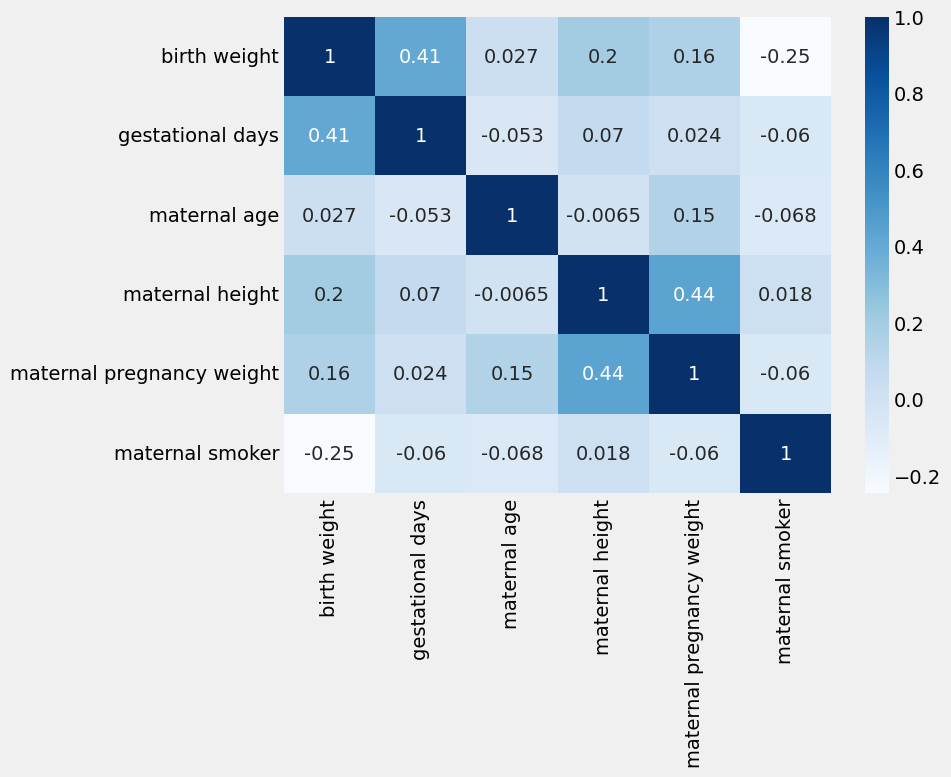

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(births.corr(), cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

From the results, we can see that `gestational days` is related to `birth weight.` We will now compute the average number of gestation days.

In [32]:
print(births['gestational days'].mean())

279.1013628620102


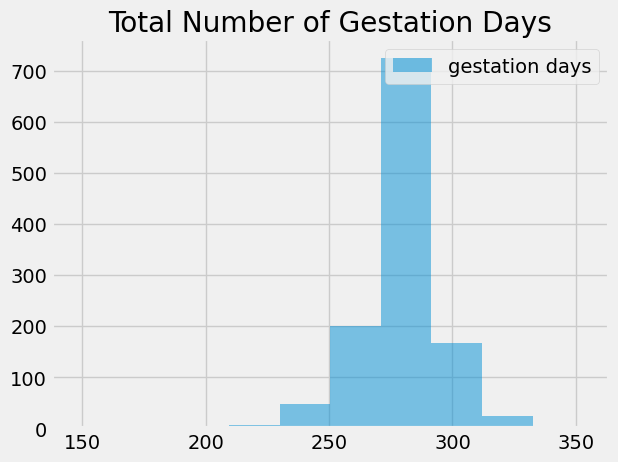

In [33]:
plt.hist(births['gestational days'], alpha = .5, label = "gestation days")
plt.legend(loc="upper right")
plt.title("Total Number of Gestation Days")
plt.show()

We see that the average is about 279 days or 9.17 months. Let's split our data into babies with more than 279 gestation days and babies with less than 279 gestation days.

In [34]:
gestation_high = births[births['gestational days'] >= 279]
gestation_low = births[births['gestational days'] < 279]

In [40]:
# Count number of high and low gestation days
print(gestation_high['gestational days'].count())
print(gestation_low['gestational days'].count())

640
534


This defines 640 babies with high gestation days and 534 babies with low gestation days among the 1174 babies sampled. We will now verify that the data is normally distributed using a histogram and the stats library.

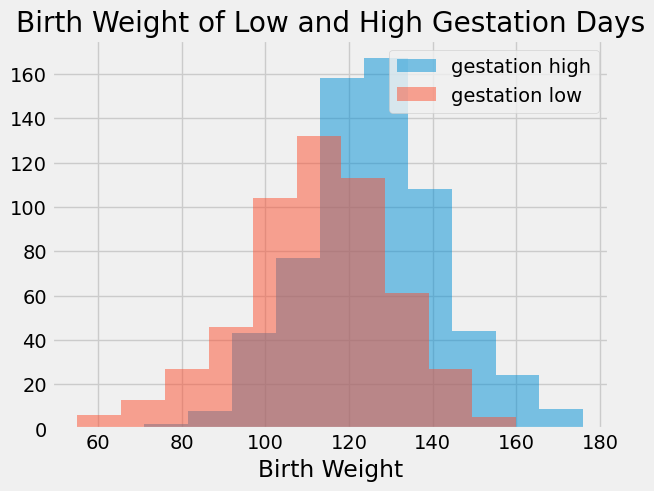

In [44]:
plt.hist(gestation_high['birth weight'], alpha = .5, label = "gestation high")
plt.hist(gestation_low['birth weight'], alpha = .5, label = "gestation low")
plt.legend(loc="upper right")
plt.xlabel('Birth Weight')
plt.title("Birth Weight of Low and High Gestation Days")
plt.show()

In [46]:
print(stats.describe(gestation_high['birth weight']))
print(stats.describe(gestation_low['birth weight']))

DescribeResult(nobs=640, minmax=(71, 176), mean=125.6484375, variance=271.4614999021909, skewness=0.2061820168514817, kurtosis=0.20994131243454728)
DescribeResult(nobs=534, minmax=(55, 160), mean=112.04868913857678, variance=312.85691197447846, skewness=-0.3375533904832361, kurtosis=0.10915755852073339)


Once again, our histogram and statistics show that our data is normally distributed. We will now perform a t-test for independent samples and analyze the 95% confidence interval.

In [47]:
# Conduct the t-test
stats.ttest_ind(gestation_high['birth weight'], gestation_low['birth weight'])

TtestResult(statistic=13.618945273465108, pvalue=2.5579713792744027e-39, df=1172.0)

In [50]:
print(get_95_ci(gestation_high['birth weight'], gestation_low['birth weight']))

The difference in means at the 95% confidence interval (two-tail) is between -15.569556123973866 and -11.629940598872581.


Our results show that the number of gestation days does impact birth weight. Also, the 95% confidence interval suggests that the difference in birth weight between low and high gestation days is between 11.62 and 15.57 ounces.

In [55]:
print(gestation_high['birth weight'].mean())

125.6484375


Also, the mean weight of babies with high gestation days is 125.64 ounces.

In [56]:
print(gestation_low['birth weight'].mean())

112.04868913857678


And the mean weight of babies with low gestation days is 112.04 ounces.

## Conclusions

Our analysis shows that `smoking` does infleunce `birth weight`. Mothers who are interested in having healthy children should limit or stop smoking in order to increase `birth weight` of newborns. Furthermore, the number of `gestation days` also influcences `birth weight`. As I was born over a month premature and weighed approximately 3 pounds, I know that long gestation periods should increase `birth weight`. Further analysis can be performed, including:


* Does `maternal age`, `maternal height`, or `maternal pregnancy weight` impact the `birth weight` of newborns?
* Are multiple variables related to the `birth weight` or newborns? Could we further study the relationship between `maternal height`, `smoking`, and `birth weight`? Would this lead to more interesting results?
* Does `alcohol consumption` decrease `birth weight`? We would need to look at data from a different data source or conduct a different study.
* Does variables from the father influence `birth weight`? We would once again need to perform a different study.

